# A3.1 Support Vector Machines y Multiple Testing

## Punto 1

1. Se importan los datos al ambiente de trabajo y se revisa que no haya huecos.

In [28]:
import pandas as pd

# Se importan los datos del csv a un dataframe de pandas
df = pd.read_csv("A3.1 Khan.csv")

# Se imprime la información del dataframe (variables y registros)
print(df.info())

# Se imprimen los 10 primeros registros
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83 entries, 0 to 82
Columns: 2309 entries, X1 to y
dtypes: float64(2308), int64(1)
memory usage: 1.5 MB
None


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X2300,X2301,X2302,X2303,X2304,X2305,X2306,X2307,X2308,y
0,0.773344,-2.438405,-0.482562,-2.721135,-1.217058,0.827809,1.342604,0.057042,0.133569,0.565427,...,-0.027474,-1.660205,0.588231,-0.463624,-3.952845,-5.496768,-1.414282,-0.647600,-1.763172,2
1,-0.078178,-2.415754,0.412772,-2.825146,-0.626236,0.054488,1.429498,-0.120249,0.456792,0.159053,...,-0.246284,-0.836325,-0.571284,0.034788,-2.478130,-3.661264,-1.093923,-1.209320,-0.824395,2
2,-0.084469,-1.649739,-0.241308,-2.875286,-0.889405,-0.027474,1.159300,0.015676,0.191942,0.496585,...,0.024985,-1.059872,-0.403767,-0.678653,-2.939352,-2.736450,-1.965399,-0.805868,-1.139434,2
3,0.965614,-2.380547,0.625297,-1.741256,-0.845366,0.949687,1.093801,0.819736,-0.284620,0.994732,...,0.357115,-1.893128,0.255107,0.163309,-1.021929,-2.077843,-1.127629,0.331531,-2.179483,2
4,0.075664,-1.728785,0.852626,0.272695,-1.841370,0.327936,1.251219,0.771450,0.030917,0.278313,...,0.061753,-2.273998,-0.039365,0.368801,-2.566551,-1.675044,-1.082050,-0.965218,-1.836966,2
5,0.458816,-2.875286,0.135841,0.405398,-2.082647,0.137847,1.733530,0.396424,0.045833,0.352064,...,-1.102018,-1.545994,-0.657780,0.390081,-1.660205,-1.651302,-1.130722,-1.129175,0.041142,2
6,0.067098,-1.624044,0.519627,0.238229,-1.397558,0.138805,1.825291,-0.305439,-0.052873,-1.242367,...,0.031596,-1.713133,-0.731680,0.380694,-3.051245,-0.250129,-0.364995,-1.969691,-1.421714,2
7,0.094128,-1.795165,0.702751,0.206038,-1.868209,0.288182,1.406072,0.760338,-0.039053,0.136103,...,0.093126,-2.269150,-0.077853,0.345574,-2.570465,-1.730476,-1.116267,-0.999944,-1.926206,2
8,0.108316,-1.944911,0.600099,-0.051083,-1.981952,0.119204,1.849116,0.237520,-0.050346,-0.252701,...,-0.408119,-2.422495,-0.263835,-0.633747,-3.107782,-1.942815,-0.118558,-2.691193,-2.221005,2
9,-0.970747,-2.347582,-0.392006,-0.141218,-1.823250,-0.303540,1.498551,-0.206409,0.144793,-1.572142,...,-0.226148,-2.302585,0.235862,-0.930897,-2.519498,-2.444149,-0.055618,-0.924071,-1.918003,2


2. Se revisa si el dataframe tiene huecos o no, en caso de que los tenga los registros se sustituyen con la media de los datos de esa columna. 

In [29]:
import numpy as np

# Imprimir cantidad de huecos en el dataframe antes de correr el proceso
# Huecos por columna
print("Faltantes por columna (antes):\n", df.isna().sum())

# Total de huecos en todo el DataFrame
print("Total de huecos (antes):", df.isna().sum().sum())

# Recorrer cada columna del dataframe para procesar y llenar los huecos
for col in df.columns:
    if pd.api.types.is_numeric_dtype(df[col]):
        df[col] = df[col].fillna(df[col].mean()) # Si es numerica, llenar con la media 

# Imprimir nuevamente los datos
# Huecos por columna
print("Faltantes por columna (después):\n", df.isna().sum())

# Total de huecos en todo el DataFrame
print("Total de huecos (después):", df.isna().sum().sum())

Faltantes por columna (antes):
 X1       0
X2       0
X3       0
X4       0
X5       0
        ..
X2305    0
X2306    0
X2307    0
X2308    0
y        0
Length: 2309, dtype: int64
Total de huecos (antes): 0
Faltantes por columna (después):
 X1       0
X2       0
X3       0
X4       0
X5       0
        ..
X2305    0
X2306    0
X2307    0
X2308    0
y        0
Length: 2309, dtype: int64
Total de huecos (después): 0


3. Se calcula la diferencia de promedios entre las clases 2 y 4 para todos los genes, y se imprime los 10 genes con la mayor diferencia de medias.

In [30]:
# Filtrar solo las clases 2 y 4
filt2_4 = df[df['y'].isin([2, 4])] 

# Separar las clases
c_2 = filt2_4[filt2_4['y'] == 2].drop(columns='y')
c_4 = filt2_4[filt2_4['y'] == 4].drop(columns='y')

# Calcular la media por gen en cada clase
mean_2 = c_2.mean()
mean_4 = c_4.mean()

# Calcular la diferencia absoluta
diff = (mean_2 - mean_4).abs()

# Obtener los 10 genes con mayor diferencia
top_10_genes = diff.sort_values(ascending=False).head(10)
top_10_genes

X187     3.323151
X509     2.906537
X2046    2.424515
X2050    2.401783
X129     2.165185
X1645    2.065460
X1319    2.045941
X1955    2.037340
X1003    2.011337
X246     1.837830
dtype: float64

4. Analizando los 10 genes que tienen la mayor diferencia de medias, se puede decir que las diferencias oscilan entre 1.83 y 3.32, los genes que tienen una diferencia de medias alta sugieren que pueden ser importantes para entender mecanismos subyacentes y construir modelos predictivos, sin embargo aún se tienen que hacer diferentes pruebas estadísticas para respaldarlo y saber si en realidad son estadísticamente significativas. 

- **Hipótesis nula**: No existe una diferencia de medias estadísticamente significativa en la o las variables seleccionadas.
- **Hipótesis alternativa**: Existe una diferencia de medias que es estadísticamente significativa en la o las variables seleccionadas.  

## Punto 2

5. Se calcula el estadístico t y el p-value para comparar las medias de todos los genes entre la clase 2 y la clase 4 de la base de datos. Se utilizan las metodologías de Bonferroni, de Holm y de Benjamini-Hochberg para corregir múltiples pruebas y se indica, para cada una, cuales son los genes tienen una expresión significativamente distinta entre las clases (manejando un control de 0.05) utilizando la función de multipletests de statsmodels.stats.multitest.

In [31]:
from scipy.stats import ttest_ind
from statsmodels.stats.multitest import multipletests

# Calcular t-test para cada gen (con ayuda de GPT)
t_values = []
p_values = []
genes = class_2.columns

for gene in genes:
    t_stat, p_val = ttest_ind(class_2[gene], class_4[gene], equal_var=False)
    t_values.append(t_stat)
    p_values.append(p_val)

# Correcciones por múltiples pruebas
alpha = 0.05
rej_bonf, p_bonf, _, _ = multipletests(p_values, alpha=alpha, method='bonferroni')
rej_holm, p_holm, _, _ = multipletests(p_values, alpha=alpha, method='holm')
rej_bh, p_bh, _, _ = multipletests(p_values, alpha=alpha, method='fdr_bh')

# Crear un dataframe para los resultados
res = pd.DataFrame({
    'Gen': genes,
    't_value': t_values,
    'p_value': p_values,
    'p_bonf': p_bonf,
    'rej_bonf': rej_bonf,
    'p_holm': p_holm,
    'rej_holm': rej_holm,
    'p_bh': p_bh,
    'rej_bh': rej_bh
})

# Imprimir la cantidad de genes significativos por método
print(f"Bonferroni: {res['rej_bonf'].sum()}")
print(f"Holm: {res['rej_holm'].sum()}")
print(f"Benjamini-Hochberg: {res['rej_bh'].sum()}")

# Filtrar genes significativos según cada corrección
sig_bonf = res[res['rej_bonf']][['Gen', 't_value', 'p_value', 'p_bonf']]
print("\n\nGenes significativos con Bonferroni")
print(sig_bonf)

sig_holm = res[res['rej_holm']][['Gen', 't_value', 'p_value', 'p_holm']]
print("\nGenes significativos con holm")
print(sig_holm)

sig_bh = res[res['rej_bh']][['Gen', 't_value', 'p_value', 'p_bh']]
print("\nGenes significativos con Benjamini-Hochberg")
print(sig_bh)

Bonferroni: 72
Holm: 72
Benjamini-Hochberg: 296


Genes significativos con Bonferroni
        Gen    t_value       p_value        p_bonf
1        X2  -6.900138  7.383962e-08  1.704218e-04
35      X36   5.610781  7.885432e-07  1.819958e-03
66      X67  -4.793322  1.413077e-05  3.261383e-02
128    X129  -8.412602  2.516574e-09  5.808252e-06
173    X174  -6.974367  5.603441e-09  1.293274e-05
...     ...        ...           ...           ...
2045  X2046 -10.842463  1.769295e-14  4.083533e-11
2049  X2050 -10.983249  4.084836e-15  9.427801e-12
2114  X2115  -5.069148  7.286580e-06  1.681743e-02
2145  X2146  -7.567062  7.001831e-10  1.616023e-06
2246  X2247  -6.050112  3.066047e-07  7.076436e-04

[72 rows x 4 columns]

Genes significativos con holm
        Gen    t_value       p_value        p_holm
1        X2  -6.900138  7.383962e-08  1.682067e-04
35      X36   5.610781  7.885432e-07  1.786050e-03
66      X67  -4.793322  1.413077e-05  3.168120e-02
128    X129  -8.412602  2.516574e-09  5.7604

## Punto 3

6. Se comparan las medias de las 4 clases de la base de datos, para esto se realizan pruebas de análisis de varianza ANOVA haciendo uso de la función f_oneway de scipy.stats y la estratificación de los datos por clase.

In [33]:
from scipy.stats import f_oneway

# Identificar clases únicas
clases = sorted(df['y'].unique())

# Estratificar por clase
estratificados = [df[df['y'] == clase].drop(columns='y') for clase in clases]

# Realizar ANOVA para cada gen (con ayuda de GPT)
f_stats = []
p_vals_anova = []
genes = df.columns.drop('y')

for gene in genes:
    grupos_gene = [grupo[gene] for grupo in estratificados]
    f_stat, p_val = f_oneway(*grupos_gene)
    f_stats.append(f_stat)
    p_vals_anova.append(p_val)

# Correcciones por múltiples pruebas
rej_bonf, p_bonf, _, _ = multipletests(p_vals_anova, alpha=0.05, method='bonferroni')
rej_holm, p_holm, _, _ = multipletests(p_vals_anova, alpha=0.05, method='holm')
rej_bh, p_bh, _, _ = multipletests(p_vals_anova, alpha=0.05, method='fdr_bh')

# Crear un nuevo dataframe con los resultados
annova_res = pd.DataFrame({
    'Gen': genes,
    'f_stat': f_stats,
    'p_anova': p_vals_anova,
    'p_bonf': p_bonf,
    'rej_bonf': rej_bonf,
    'p_holm': p_holm,
    'rej_holm': rej_holm,
    'p_bh': p_bh,
    'rej_bh': rej_bh
})

# Imprimir la cantidad de genes significativos por cada corrección
print(f"Bonferroni: {annova_res['rej_bonf'].sum()}")
print(f"Holm: {annova_res['rej_holm'].sum()}")
print(f"Benjamini-Hochberg: {annova_res['rej_bh'].sum()}")

# Filtrar genes significativos según cada corrección
sig_bonf_anova = annova_res[annova_res['rej_bonf']][['Gen', 'f_stat', 'p_anova', 'p_bonf']]
print("\n\nGenes significativos con Bonferroni")
print(sig_bonf)

sig_holm_anova = annova_res[annova_res['rej_holm']][['Gen', 'f_stat', 'p_anova', 'p_holm']]
print("\nGenes significativos con holm")
print(sig_holm)

sig_bh_anova = annova_res[annova_res['rej_bh']][['Gen', 'f_stat', 'p_anova', 'p_bh']]
print("\nGenes significativos con Benjamini-Hochberg")
print(sig_bh)

Bonferroni: 404
Holm: 412
Benjamini-Hochberg: 1162


Genes significativos con Bonferroni
        Gen    t_value       p_value        p_bonf
1        X2  -6.900138  7.383962e-08  1.704218e-04
35      X36   5.610781  7.885432e-07  1.819958e-03
66      X67  -4.793322  1.413077e-05  3.261383e-02
128    X129  -8.412602  2.516574e-09  5.808252e-06
173    X174  -6.974367  5.603441e-09  1.293274e-05
...     ...        ...           ...           ...
2045  X2046 -10.842463  1.769295e-14  4.083533e-11
2049  X2050 -10.983249  4.084836e-15  9.427801e-12
2114  X2115  -5.069148  7.286580e-06  1.681743e-02
2145  X2146  -7.567062  7.001831e-10  1.616023e-06
2246  X2247  -6.050112  3.066047e-07  7.076436e-04

[72 rows x 4 columns]

Genes significativos con holm
        Gen    t_value       p_value        p_holm
1        X2  -6.900138  7.383962e-08  1.682067e-04
35      X36   5.610781  7.885432e-07  1.786050e-03
66      X67  -4.793322  1.413077e-05  3.168120e-02
128    X129  -8.412602  2.516574e-09  5.7

## Punto 4

7. Como ya se saben cuales son las variables estadísticamente más significativas de acuerdo a los estudios y pruebas realizadas anteriormente, se procede a entrenar algunos modelos de Support Vector Machines, uno con un kernel polinomial de orden 3 y otro con un kernel radial. Para evitar que el tiempo de procesamiento sea exagerado, se procederá a seleccionar solo las variables más significativas partiendo de los resultados obtenidos en los puntos anteriores. Aunque esta no es una práctica adecuada, ya que se esta cayendo en una situación de fuga de datos, se hará de esta manera ya que este es un ejercicio con fines educativos. Lo ideal sería que la selección de características se basara solamente en experimentos realizados con los datos de entrenamiento, pero en este caso se obviará este detalle.

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

# Seleccionar genes significativos
selected_genes = annova_res[annova_res['rej_bh']]['Gen'].tolist()

# Preparar datos
X = df[selected_genes]
y = df['y']
X_scaled = StandardScaler().fit_transform(X)

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, stratify=y, random_state=42)

# Modelos SVM y entrenamiento
svm_linear = SVC(kernel='linear').fit(X_train, y_train)
svm_poly = SVC(kernel='poly', degree=3).fit(X_train, y_train)
svm_rbf = SVC(kernel='rbf').fit(X_train, y_train)

# Predicción
yhat_linear = svm_linear.predict(X_test)
yhat_poly = svm_poly.predict(X_test)
yhat_rbf = svm_rbf.predict(X_test)

# Evaluación
rep_linear = classification_report(y_test, yhat_linear, output_dict=True)
rep_poly = classification_report(y_test, yhat_poly, output_dict=True)
rep_rbf = classification_report(y_test, yhat_rbf, output_dict=True)

# Mostrar los resultados
print("Medidas de exactitud:\n")
pd.DataFrame({
    'Lineal': [rep_linear['accuracy']],
    'Polinomial': [rep_poly['accuracy']],
    'Radial': [rep_rbf['accuracy']]
})

Medidas de exactitud:



,Lineal,Polinomial,Radial
0,1.0,0.64,1.0


Los tipos de kernels (lineal y radial) lograron una clasificación perfecta en este conjunto de prueba, lo que sugiere que las clases pueden estar bien separadas en el espacio de características seleccionadas. Sin embargo, el tipo polinomial no logró el mismo rendimiento y esto puede deberse a un sobreajuste o una alta complejidad innecesaria.

## Punto 5

8. A continuación se calculan e imprimen todas las métricas para los 3 modelos generados con la finalidad de comparar sus desempeños, incluyendo las matrices de confusión. 

Lineal
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         9
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         8

    accuracy                           1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25



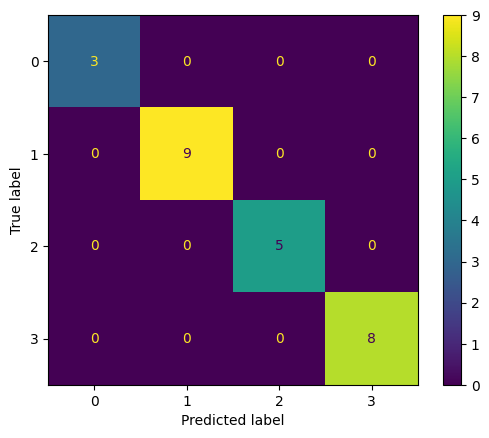

Polinomial
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3
           2       0.50      1.00      0.67         9
           3       1.00      0.40      0.57         5
           4       1.00      0.25      0.40         8

    accuracy                           0.64        25
   macro avg       0.88      0.66      0.66        25
weighted avg       0.82      0.64      0.60        25



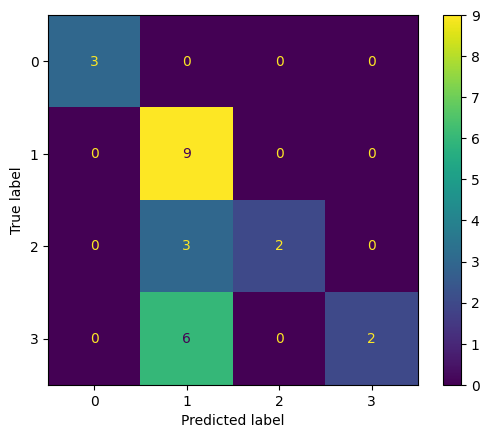

Radial
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         9
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         8

    accuracy                           1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25



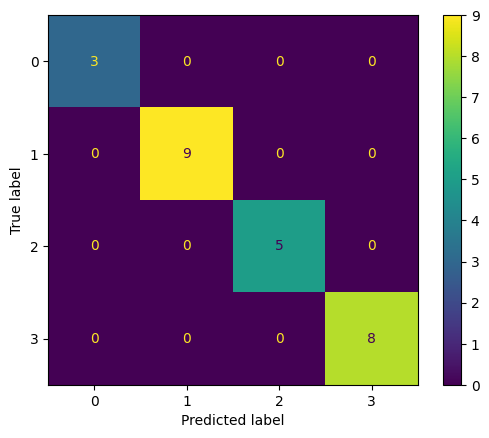

In [35]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

%matplotlib inline

# Imprimir los datos del kernel linear
print("Lineal")
print(classification_report(y_test, yhat_linear))
ConfusionMatrixDisplay(confusion_matrix(y_test, yhat_linear)).plot()
plt.show()

# Imprimir los datos del kernel polinomial
print("Polinomial")
print(classification_report(y_test, yhat_poly))
ConfusionMatrixDisplay(confusion_matrix(y_test, yhat_poly)).plot()
plt.show()

# Imprimir los datos del kernel radial
print("Radial")
print(classification_report(y_test, yhat_rbf))
ConfusionMatrixDisplay(confusion_matrix(y_test, yhat_rbf)).plot()
plt.show()

En base a estos resultados, se puede decir que el desempeño alcanzado por los modelos lineal y radial sugiere que las clases en los datos si se encuentran bien separadas en el espacio de características y debido al ajuste casi excelente que se demuestran en las métricas, si se pueden usar estos dos modelos para hacer predicciones en base a los datos. En el caso del modelo polinomial, el rendimiento no fue bueno al hacer alcanzado una exactitud de solo 0.64, muy seguramente a causa de la complejidad y el sobreajuste, además, su matriz de confusión refleja errores graves en la clasificación entre diferentes clases.

En conclusión, cualquiera de los modelos SVM con kernels radial o lineal pueden ser utilizados, el lineal suele ser mas simple e interpretable y sería la mejor opción si se prefiere interpretabilidad y eficiencia. Sin embargo, si se sospecha que existen relaciones no lineales entre variables, entonces el radial sería en cambio la mejor opción para poder capturar mejor esas complejidades.